## Assessment Center: Python Datenanalyse

Willkommen zu unserem Python Skill Assessment. In diesem Notebook werden Sie gebeten, eine Reihe von Datenanalyse-Aufgaben durchzuführen.

**Die Aufgabe:**
Wir analysieren die Datei `Lastgang.csv`, die Messdaten (Stromverbrauch, Temperatur etc.) im 15-Minuten-Takt für ein Universitätsgebäude enthält.

**Ihr Setup:**
Um Ihnen den Einstieg zu erleichtern, stellen wir Ihnen die ersten Zellen zur Verfügung. Diese laden die Daten, bereiten sie auf und führen eine erste Visualisierung sowie eine Datentransformation (Pivot-Tabellen) durch. Sie können diesen Code ausführen, um Ihre Arbeitsumgebung einzurichten.

**Ihre Aufgaben:**
Im Anschluss an die vorbereiteten Zellen finden Sie eine Liste von Aufgaben. Diese sind von Ihnen selbstständig zu lösen.

**Wichtiger Hinweis:** Die Anzahl der Aufgaben ist bewusst so gewählt, dass sie wahrscheinlich nicht alle in der zur Verfügung stehenden Zeit bewältigt werden können. **Das ist beabsichtigt.** Bitte bearbeiten Sie so viele Aufgaben, wie Sie schaffen. Konzentrieren Sie sich auf sauberen, lesbaren und korrekten Code.

**Hilfestellung:** Bitte verwenden Sie keine KI zur Codegenerierung, sie können jedoch ohne weiteres Internetrecherche verwenden um geeignete Bibliotheken oder Funktionen zu finden.

Viel Erfolg!

---
### 1: Datenimport und Vorbereitung

Im ersten Schritt importieren wir die `pandas`-Bibliothek. Anschließend lesen wir die Datei `Lastgang.csv` ein. Dabei achten wir auf die Besonderheiten der Datei:
* Trennzeichen ist ein Semikolon (`;`).
* Dezimaltrennzeichen ist ein Komma (`,`).
* Die Spalte `Datum` wird direkt als Datums-Objekt eingelesen (`parse_dates`) und als Index des DataFrames gesetzt.

Abschließend prüfen wir mit `df.head()` und `df.info()`, ob der Import erfolgreich war.

In [1]:
# @title
import pandas as pd

df = pd.read_csv(
    'Lastgang.csv',
    sep=';',
    decimal=',',
    parse_dates=['Datum'],
    dayfirst=True
)

df = df.set_index('Datum')

df.head()

Stromverbrauch [kW]  Temperatur [°C]  \
Datum                                                       
2022-01-01 00:15:00                 1120            14.80   
2022-01-01 00:30:00                 1170            14.75   
2022-01-01 00:45:00                 1155            14.70   
2022-01-01 01:00:00                 1150            14.45   
2022-01-01 01:15:00                 1145            14.20   

                     Luftfeuchtigkeit [% r.F.]  Globalstrahlung [W/m²]  
Datum                                                                   
2022-01-01 00:15:00                       60.0                     0.0  
2022-01-01 00:30:00                       60.5                     0.0  
2022-01-01 00:45:00                       61.0                     0.0  
2022-01-01 01:00:00                       61.5                     0.0  
2022-01-01 01:15:00                       62.0                     0.0

### 2: Visualisierung der Zeitreihen

Da die vier Messgrößen sehr unterschiedliche Einheiten und Wertebereiche haben (kW, °C, %, W/m²), ist ein gemeinsamer Plot unübersichtlich.

Wir verwenden hier `plotly.subplots`, um vier separate Diagramme untereinander zu erstellen. Mit `shared_xaxes=True` stellen wir sicher, dass alle Plots dieselbe X-Achse (das Datum) verwenden, was den Vergleich erleichtert.

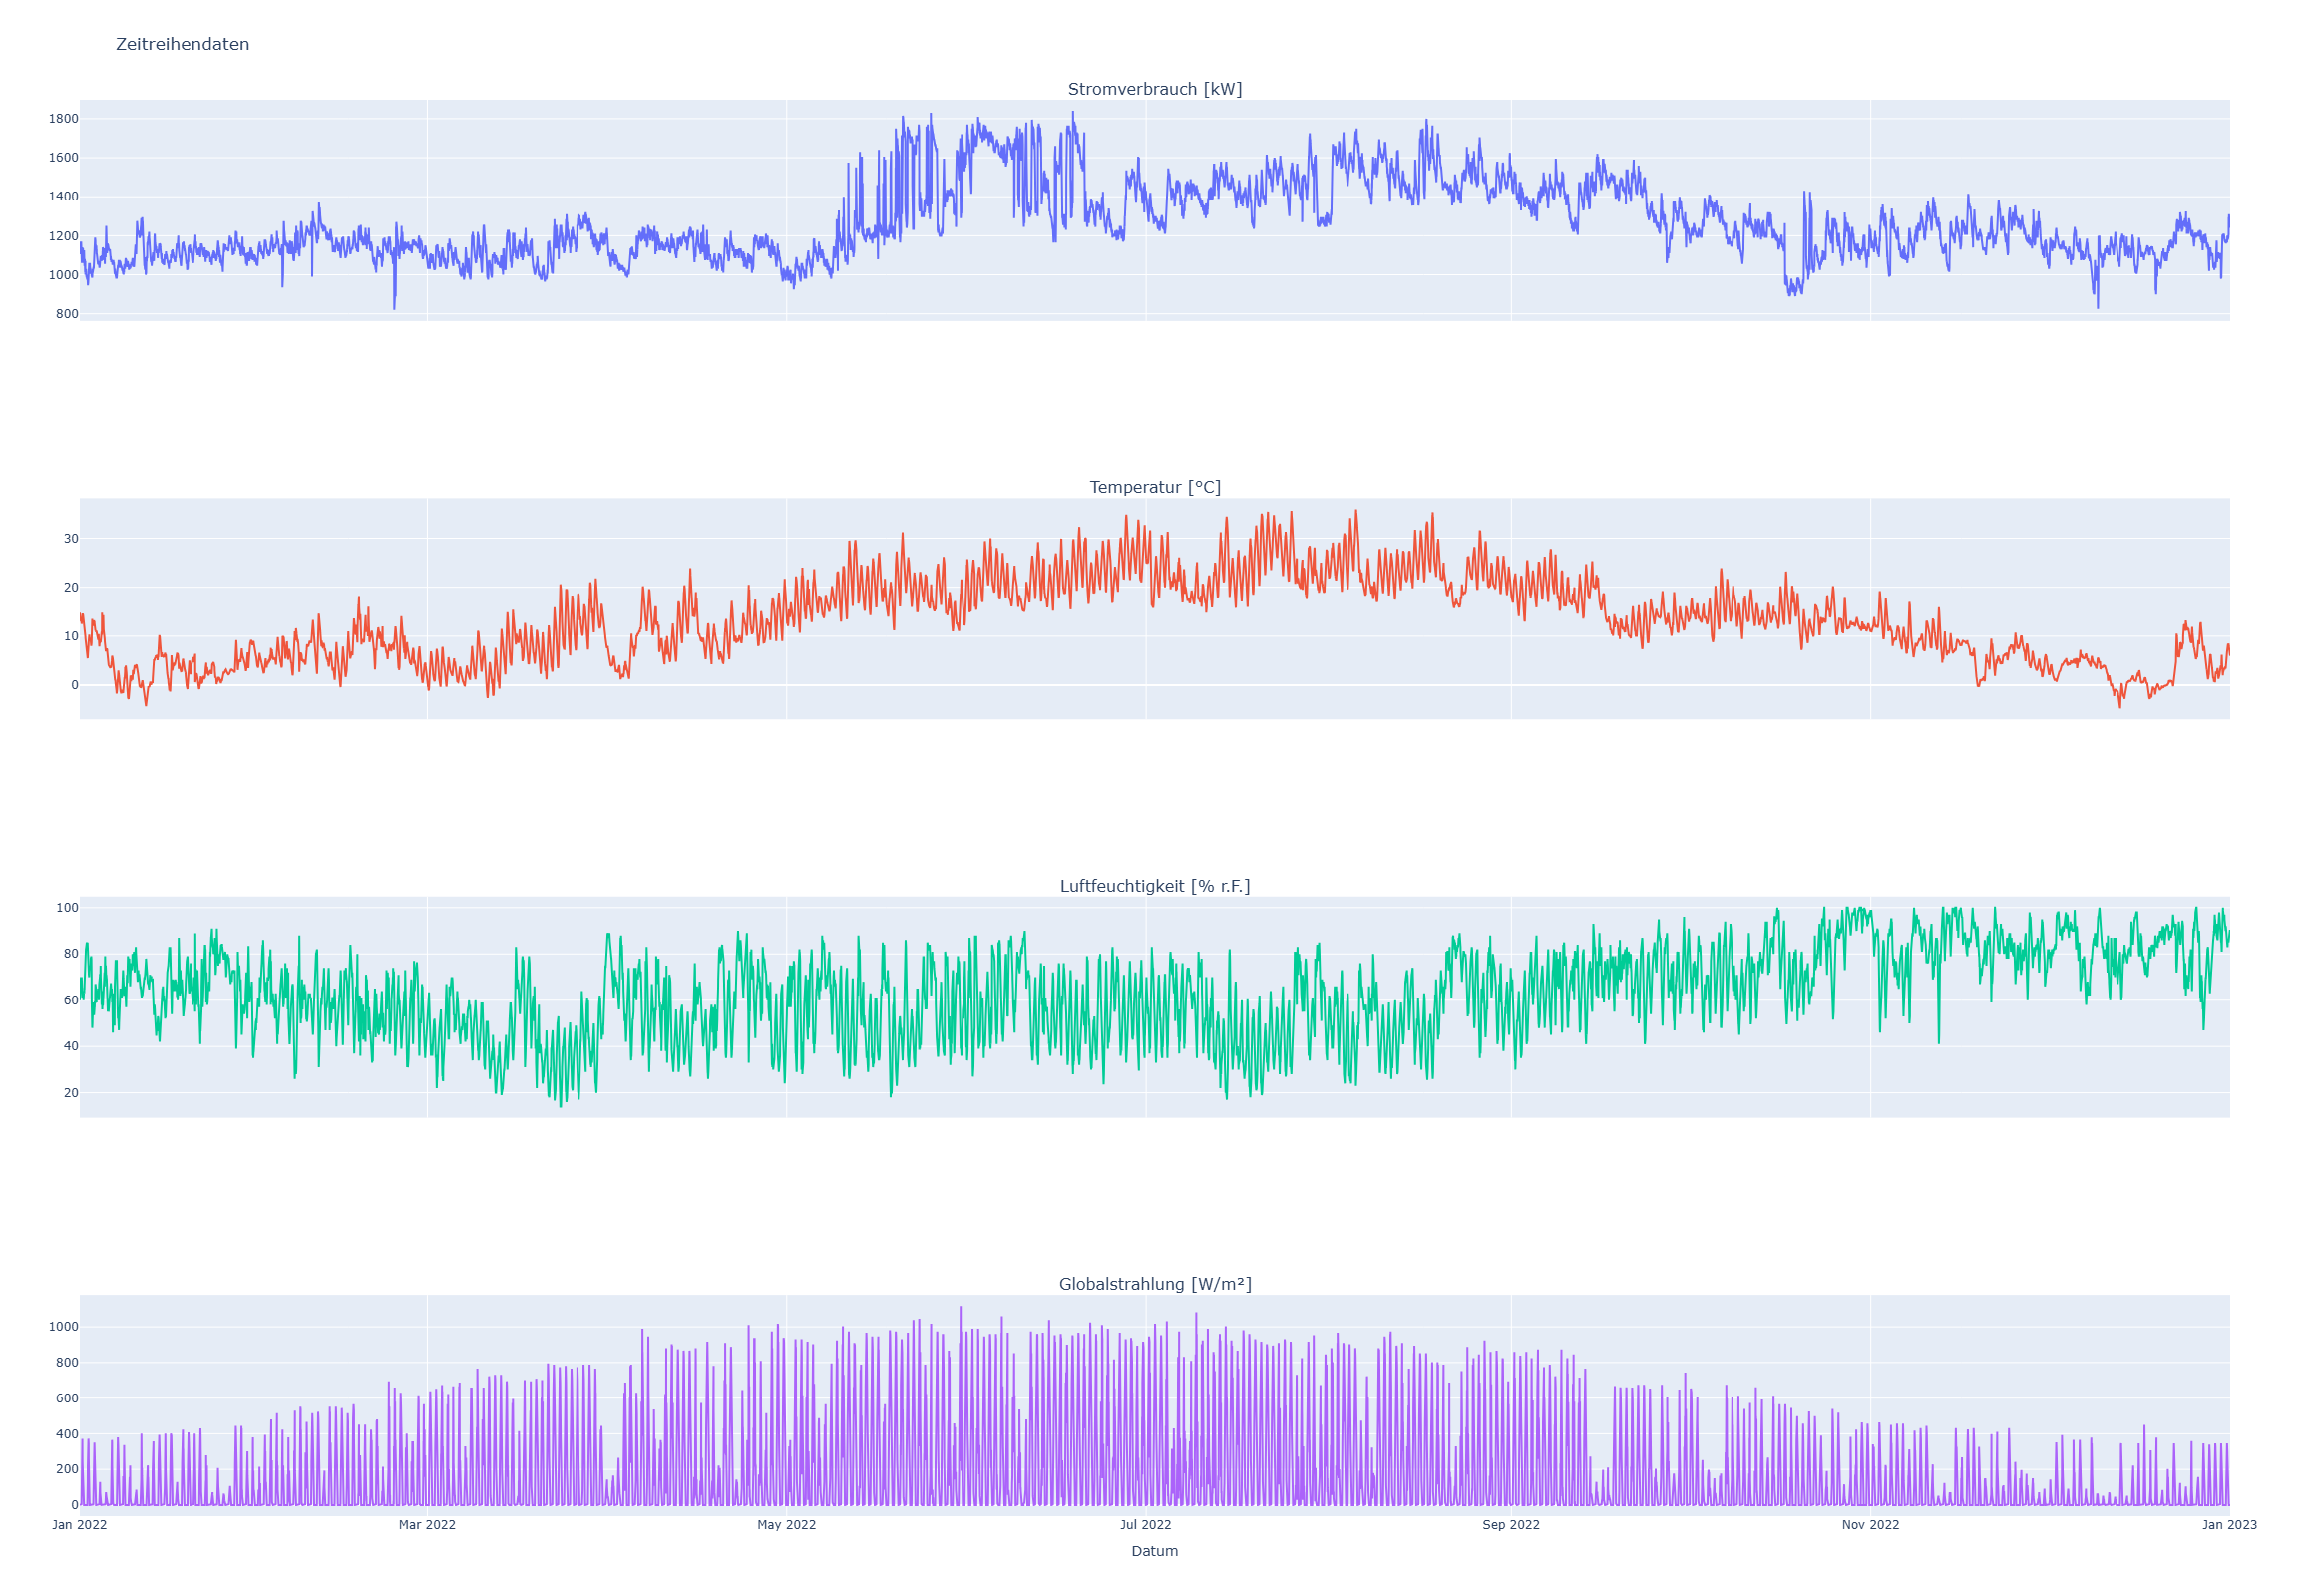

In [2]:
# @title
from plotly.subplots import make_subplots
import plotly.graph_objects as go

columns_to_plot = [
    'Stromverbrauch [kW]',
    'Temperatur [°C]',
    'Luftfeuchtigkeit [% r.F.]',
    'Globalstrahlung [W/m²]'
]

fig = make_subplots(
    rows=len(columns_to_plot),
    cols=1,
    shared_xaxes=True,
    subplot_titles=columns_to_plot
)

for i, col_name in enumerate(columns_to_plot):

    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[col_name],
            name=col_name
        ),
        row=i + 1,
        col=1
    )

fig.update_layout(
    autosize=True,
    height=1600,
    width=1400,
    title_text='Zeitreihendaten',
    showlegend=False
)

fig.update_xaxes(title_text='Datum', row=len(columns_to_plot), col=1)

fig.show()

### 3: Pivot-Tabellen erstellen

Für viele Analysen (z.B. die Untersuchung von Tagesprofilen) ist es hilfreich, die Daten in einer Pivot-Form zu haben, bei der jede Zeile einen Tag und jede Spalte eine Uhrzeit darstellt.

Wir erstellen hierfür vier separate Pivot-Tabellen (für jede Messgröße eine). Die neuen, einfacheren Variablennamen (`stromverbrauch_pv`, `temperatur_pv` etc.) können Sie in den folgenden Aufgaben direkt verwenden.

In [3]:
# @title
df_temp = df.reset_index()

df_temp['Tag'] = df_temp['Datum'].dt.date
df_temp['Uhrzeit'] = df_temp['Datum'].dt.time

stromverbrauch_pv = pd.pivot_table(
    df_temp,
    values='Stromverbrauch [kW]',
    index='Tag',
    columns='Uhrzeit',
    aggfunc='mean'
)

temperatur_pv = pd.pivot_table(
    df_temp,
    values='Temperatur [°C]',
    index='Tag',
    columns='Uhrzeit',
    aggfunc='mean'
)

luftfeuchtigkeit_pv = pd.pivot_table(
    df_temp,
    values='Luftfeuchtigkeit [% r.F.]',
    index='Tag',
    columns='Uhrzeit',
    aggfunc='mean'
)

globalstrahlung_pv = pd.pivot_table(
    df_temp,
    values='Globalstrahlung [W/m²]',
    index='Tag',
    columns='Uhrzeit',
    aggfunc='mean'
)


stromverbrauch_pv.head()


Uhrzeit     00:00:00  00:15:00  00:30:00  00:45:00  01:00:00  01:15:00  \
Tag                                                                      
2022-01-01       NaN    1120.0    1170.0    1155.0    1150.0    1145.0   
2022-01-02    1005.0    1045.0    1050.0    1050.0    1035.0    1045.0   
2022-01-03    1005.0    1010.0     995.0     995.0    1005.0    1005.0   
2022-01-04    1060.0    1065.0    1070.0    1080.0    1065.0    1060.0   
2022-01-05    1130.0    1125.0    1130.0    1110.0    1100.0    1125.0   

Uhrzeit     01:30:00  01:45:00  02:00:00  02:15:00  ...  21:30:00  21:45:00  \
Tag                                                 ...                       
2022-01-01    1140.0    1150.0    1145.0    1150.0  ...    1050.0    1050.0   
2022-01-02    1005.0    1030.0    1015.0    1020.0  ...    1000.0    1000.0   
2022-01-03     995.0     995.0    1005.0    1000.0  ...    1100.0    1095.0   
2022-01-04    1065.0    1065.0    1060.0    1055.0  ...    1140.0    1110.0   
2022-01-05    1120.0    1120.0    1135.0    1125.0  ...    1135.0    1130.0   

Uhrzeit     22:00:00  22:15:00  22:30:00  22:45:00  23:00:00  23:15:00  \
Tag                                                                      
2022-01-01    1010.0    1070.0    1020.0    1070.0    1000.0    1040.0   
2022-01-02    1015.0    1005.0     995.0     995.0    1005.0    1000.0   
2022-01-03    1090.0    1090.0    1090.0    1080.0    1070.0    1065.0   
2022-01-04    1095.0    1110.0    1120.0    1105.0    1100.0    1100.0   
2022-01-05    1130.0    1135.0    1130.0    1130.0    1125.0    1130.0   

Uhrzeit     23:30:00  23:45:00  
Tag                             
2022-01-01    1035.0    1065.0  
2022-01-02     995.0    1000.0  
2022-01-03    1070.0    1075.0  
2022-01-04    1120.0    1130.0  
2022-01-05    1130.0    1125.0  

[5 rows x 96 columns]

### Aufgabe 1: Geordnete Jahresdauerlinie erstellen
Erstellen Sie eine Grafik der geordneten Jahresdauerlinie. Diese soll alle Stromverbrauchswerte (kW) des Jahres, sortiert vom höchsten bis zum niedrigsten Wert, anzeigen.

In [4]:
# @title
import plotly.express as px

# 1. Alle Stromverbrauchswerte absteigend sortieren
dauerlinie = df['Stromverbrauch [kW]'].sort_values(ascending=False).reset_index(drop=True)

# 2. Dauerlinie plotten
fig = px.line(
    dauerlinie,
    y='Stromverbrauch [kW]',
    title='Geordnete Jahresdauerlinie'
)

fig.update_layout(
    autosize=True,
    height=600,
    width=1400,
    xaxis_title='Anzahl 15-Minuten-Intervalle',
    yaxis_title='Leistung [kW]'
)

fig.update_yaxes(rangemode='tozero')

fig.show()

### Aufgabe 2: Gesamtenergieverbrauch berechnen
Berechnen Sie den gesamten Energieverbrauch (in MWh) für den gesamten Zeitraum des Datensatzes.

In [5]:
# @title
# 1. Summe aller Leistungswerte (kW)
summe_kw = df['Stromverbrauch [kW]'].sum()

# 2. Umrechnung in kWh (kW * 0.25 h)
total_kwh = summe_kw * 0.25

# 3. Umrechnung in MWh (kWh / 1000)
total_mwh = total_kwh / 1000

print(f"Gesamtenergieverbrauch: {total_mwh:.2f} MWh")

Gesamtenergieverbrauch: 11063.49 MWh


### Aufgabe 3: Monatsverbräuche berechnen und visualisieren
Berechnen Sie den monatlichen Gesamtenergieverbrauch (in MWh) und stellen Sie das Ergebnis in einem Balkendiagramm dar.

In [6]:
# @title
import plotly.express as px

# 1. Energie (kWh) für jeden 15-Min-Takt berechnen
df['Energie_kWh'] = df['Stromverbrauch [kW]'] * 0.25

# 2. Nach Monat resampeln, summieren und in MWh umwandeln
# 'M' steht für Monatsende (Month-End)
monatsverbrauch_mwh = df['Energie_kWh'].resample('ME').sum() / 1000

# 3. Als Balkendiagramm plotten
fig = px.bar(
    monatsverbrauch_mwh,
    title='Monatlicher Energieverbrauch',
    y='Energie_kWh'
)

fig.update_layout(
    autosize=True,
    height=600,
    width=1400,
    xaxis_title='Monat',
    yaxis_title='Energie [MWh]'
)
# Den Namen der Y-Achse im Plot anpassen (optional, aber schöner)
fig.update_traces(name='Verbrauch MWh', yaxis=None)

fig.show()

### Aufgabe 4: Durchschnittliche Tagesprofile (Mo-So) erstellen
Erstellen Sie ein Liniendiagramm, das das durchschnittliche Stromverbrauchsprofil über 24 Stunden zeigt. Es soll für jeden Wochentag (Montag bis Sonntag) eine eigene Linie geben.

In [7]:
# @title
import plotly.express as px

# 1. Wochentag und Uhrzeit als neue Spalten hinzufügen
# (Falls nicht schon in einer vorherigen Zelle geschehen)
df['Wochentag_Nr'] = df.index.weekday # 0=Montag, 6=Sonntag
df['Wochentag_Name'] = df.index.day_name()
df['Uhrzeit'] = df.index.time

# 2. Nach Wochentag und Uhrzeit gruppieren und Mittelwert bilden
tagesprofile = df.groupby(['Wochentag_Nr', 'Wochentag_Name', 'Uhrzeit'])['Stromverbrauch [kW]'].mean().reset_index()

#    Sortiere erst nach Wochentag (Nr), DANN nach Uhrzeit
tagesprofile = tagesprofile.sort_values(by=['Wochentag_Nr', 'Uhrzeit'])

# 4. Profile plotten
fig = px.line(
    tagesprofile,
    x='Uhrzeit',
    y='Stromverbrauch [kW]',
    color='Wochentag_Name', # Eine Linie pro Wochentag
    title='Durchschnittliche Tagesprofile (Mo-So)'
)

fig.update_layout(
    autosize=True,
    height=600,
    width=1400)

fig.update_yaxes(rangemode='tozero')

fig.show()

### Aufgabe 5: Temperaturkorrelation darstellen (XY-Plot)
Erstellen Sie einen Scatter-Plot (XY-Plot), um den Zusammenhang zwischen dem Stromverbrauch (kW) und der Temperatur (°C) darzustellen.

In [8]:
# @title
import plotly.express as px

# Scatter-Plot: Temperatur auf X-Achse, Stromverbrauch auf Y-Achse
fig = px.scatter(
    df,
    x='Temperatur [°C]',
    y='Stromverbrauch [kW]',
    title='Korrelation: Stromverbrauch vs. Temperatur',
    opacity=0.5 # Reduziert Deckkraft, um Dichte zu zeigen
)

fig.update_layout(
    autosize=True,
    height=600,
    width=1400)

fig.show()

### Aufgabe 6: Heatmap erstellen
Visualisieren Sie die `stromverbrauch_pv` Pivot-Tabelle als Heatmap. Die Achsen sollen die Tage des Jahres und die Uhrzeiten des Tages darstellen.

In [9]:
# @title
import plotly.express as px

# (Wir gehen davon aus, dass 'stromverbrauch_pv' existiert)

# 1. Pivot-Tabelle transponieren (T), damit Uhrzeit (Index) vertikal ist
stromverbrauch_pv_transponiert = stromverbrauch_pv.T

# 2. Heatmap mit der transponierten Tabelle erstellen
fig = px.imshow(
    stromverbrauch_pv_transponiert,
    title='Heatmap Stromverbrauch (Uhrzeit vs. Tag)',
    aspect='auto', # Passt die Pixelgröße an die Plot-Dimensionen an
    color_continuous_scale='Jet' # Setzt das Farbschema auf Blau-zu-Rot
)

# 3. Achsentitel entsprechend der Transponierung anpassen
fig.update_layout(
    autosize=True,
    height=600,
    width=1400,
    xaxis_title='Tag',
    yaxis_title='Uhrzeit',
    coloraxis_colorbar_title_text = 'kW'
)

fig.show()

### Aufgabe 7: Spitzenlast berechnen
Ermitteln Sie die absolute Spitzenlast (den höchsten gemessenen Stromverbrauchswert in kW) im gesamten Datensatz und geben Sie an, zu welchem Zeitpunkt dieser Wert aufgetreten ist.

In [10]:
# @title
# 1. Höchsten Wert finden
spitzenlast_kw = df['Stromverbrauch [kW]'].max()

# 2. Zeitpunkt (Index) des höchsten Werts finden
datum_spitzenlast = df['Stromverbrauch [kW]'].idxmax()

print(f"Spitzenlast: {spitzenlast_kw} kW")
print(f"Zeitpunkt der Spitzenlast: {datum_spitzenlast}")

Spitzenlast: 1840 kW
Zeitpunkt der Spitzenlast: 2022-06-18 14:15:00


### Aufgabe 8: Grundlast berechnen
Berechnen Sie die Grundlast (in kW). Diese ist definiert als die Leistung, die an mindestens 7.500 Stunden pro Jahr anfällt (überschritten oder erreicht wird).

In [11]:
# @title
# 1. Dauerlinie erstellen (falls nicht schon in A1 geschehen)
dauerlinie = df['Stromverbrauch [kW]'].sort_values(ascending=False).reset_index(drop=True)

# 2. Anzahl der Intervalle für 7500 Stunden
# (Unser Datensatz hat 35040 Intervalle = 8760 Stunden)
intervalle_fuer_7500h = 7500 * 4 # = 30000

# 3. Den 30.000-sten Wert ablesen (Index 29999, da 0-basiert)
grundlast_kw = dauerlinie.iloc[intervalle_fuer_7500h - 1]

print(f"Die Grundlast (Leistung bei 7500h) beträgt: {grundlast_kw} kW")

Die Grundlast (Leistung bei 7500h) beträgt: 1085 kW


### Aufgabe 9: Relativen Energieverbrauch der Grundlast berechnen
Berechnen Sie, welchen prozentualen Anteil die (in Aufgabe 8 ermittelte) Grundlast am Gesamtenergieverbrauch (aus Aufgabe 2) hat.

In [12]:
# @title
# (A2, A8 müssen vorher ausgeführt worden sein)
# (total_mwh aus A2; grundlast_kw aus A8)

# 1. Erstelle eine neue Spalte (oder Serie),
#    die den Stromverbrauch bei 'grundlast_kw' kappt (clipping)
grundlast_anteil_kw = df['Stromverbrauch [kW]'].clip(upper=grundlast_kw)

# 2. Berechne die Energie (kWh) dieses gekappten Anteils
#    Dies ist die tatsächliche "Grundlast-Energie"
energie_grundlast_kwh = grundlast_anteil_kw.sum() * 0.25
energie_grundlast_mwh = energie_grundlast_kwh / 1000

# 3. Berechne den Gesamtverbrauch (aus A2) erneut (oder verwende Variable 'total_mwh')
total_kwh = df['Stromverbrauch [kW]'].sum() * 0.25
total_mwh = total_kwh / 1000

# 4. Relativen Anteil berechnen
relativer_anteil = energie_grundlast_mwh / total_mwh

print(f"Gesamtenergie (A2): {total_mwh:.2f} MWh")
print(f"Grundlast-Leistung (A8): {grundlast_kw} kW")
print(f"Energie der Grundlast (A9): {energie_grundlast_mwh:.2f} MWh")
print(f"Relativer Anteil der Grundlast am Gesamtverbrauch: {relativer_anteil * 100:.2f} %")

Gesamtenergie (A2): 11063.49 MWh
Grundlast-Leistung (A8): 1085 kW
Energie der Grundlast (A9): 9441.71 MWh
Relativer Anteil der Grundlast am Gesamtverbrauch: 85.34 %
